# Application on paleoceanographic data (ODP1148)

## 1. Reading the data and initializing Wavepal

Start importing wavepal and other usual packages

In [1]:
% matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import copy
import wavepal as wv

In [2]:
mypath="../../figures/ODP1148_example/"

Read the data

In [3]:
data=np.genfromtxt("data/ODP1148-BF-18O.txt")
myt=data[:,0]
mydata=data[:,1]

Initialize the class called Wavepal (which is a class of the package wv)

In [4]:
x=wv.Wavepal(myt, mydata, "Age", "$\delta{}^{18}O$", t_units="ka", mydata_units="permil")

## 2. Preliminary analysis

Check the data set

In [5]:
x.check_data()

Plot the age step.

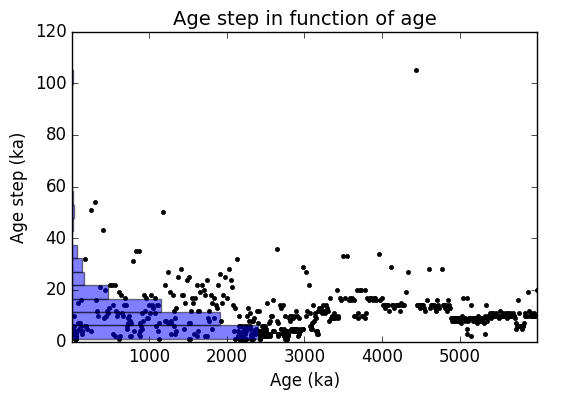

In [6]:
plot_timestep=x.plot_timestep(nbins=20)
plot_timestep.title("Age step in function of age",fontsize=14)
plot_timestep.savefig(mypath+"timestep.pdf")
plot_timestep.show()

Figure of the trend.

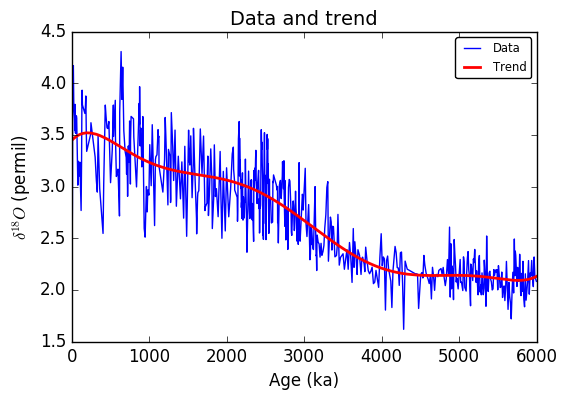

In [7]:
plot_trend=x.plot_trend(pol_degree=7)  
plot_trend.title("Data and trend",fontsize=14)
plot_trend.savefig(mypath+"data_and_trend.pdf")
plot_trend.show()

and choose the degree of the polynomial for the subsequent analyses

In [8]:
x.choose_trend_degree(7)

Compute some variables related to the trend

In [9]:
x.trend_vectors()

## 3. CARMA(p,q) Background Noise Analysis

Analytical confidence levels

In [10]:
x.carma_params(signif_level_type="an")

****************************
*        CARMA PACK        *
****************************

FIRST ROUND (to estimate the number of independent samples): with  10000  samples
**********************************************************************************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples) - Estimation:  13

SECOND ROUND: generates  130000  samples
***************************************
Calculating sigma...
Calculating log-likelihoods...


  0%|          | 0/1 [00:00<?, ?it/s]

Decorrelation length (in number of samples):  13
*******************************************************************************
*        BUILD CARMA MATRIX K AND THE CARMA MATRIX WITH MCMC SAMPLES		     *
*******************************************************************************
Generation of  10000  CAR-1 samples in order to estimate the confidence levels


100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


Computing the median parameters of the CAR-1 process from  10000  MCMC samples.
Median parameters:
--------------------
alpha:  0.169366282978
std white noise:  0.149567492813


## 4. Time-Frequency Analysis

Choose the $\textrm{x}^{\textrm{th}}$ percentiles for significance testing

In [11]:
percentile=np.zeros(1)
percentile[0]=95.
#percentile[1]=99.9

Define the times at which the CWT (continuous wavelet transform) is to be computed

In [12]:
theta=np.linspace(myt[0],myt[-1],1000)

Set the location of the ticks

In [13]:
time_string=[0., 1000., 2000., 3000., 4000., 5000., 6000.]
period_string=[10., 21., 41., 100., 200., 400., 800., 1500.]
dashed_periods=[21., 41., 100.]

### 4.1 First analysis: with w0=5,5

In [14]:
x.timefreq_analysis(theta=theta,percentile=percentile,w0=5.5,permin=10.,computes_amplitude=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

Weights for the scalogram and Shannon-Nyquist exclusion zone:


  0%|          | 0/133 [00:00<?, ?it/s]

Re-estimated period range: from  10.0  to  970.058602567
Main loop, over the time-frequency plane:


100%|██████████| 133/133 [24:19<00:00, 27.59s/it]


Figure of the scalogram

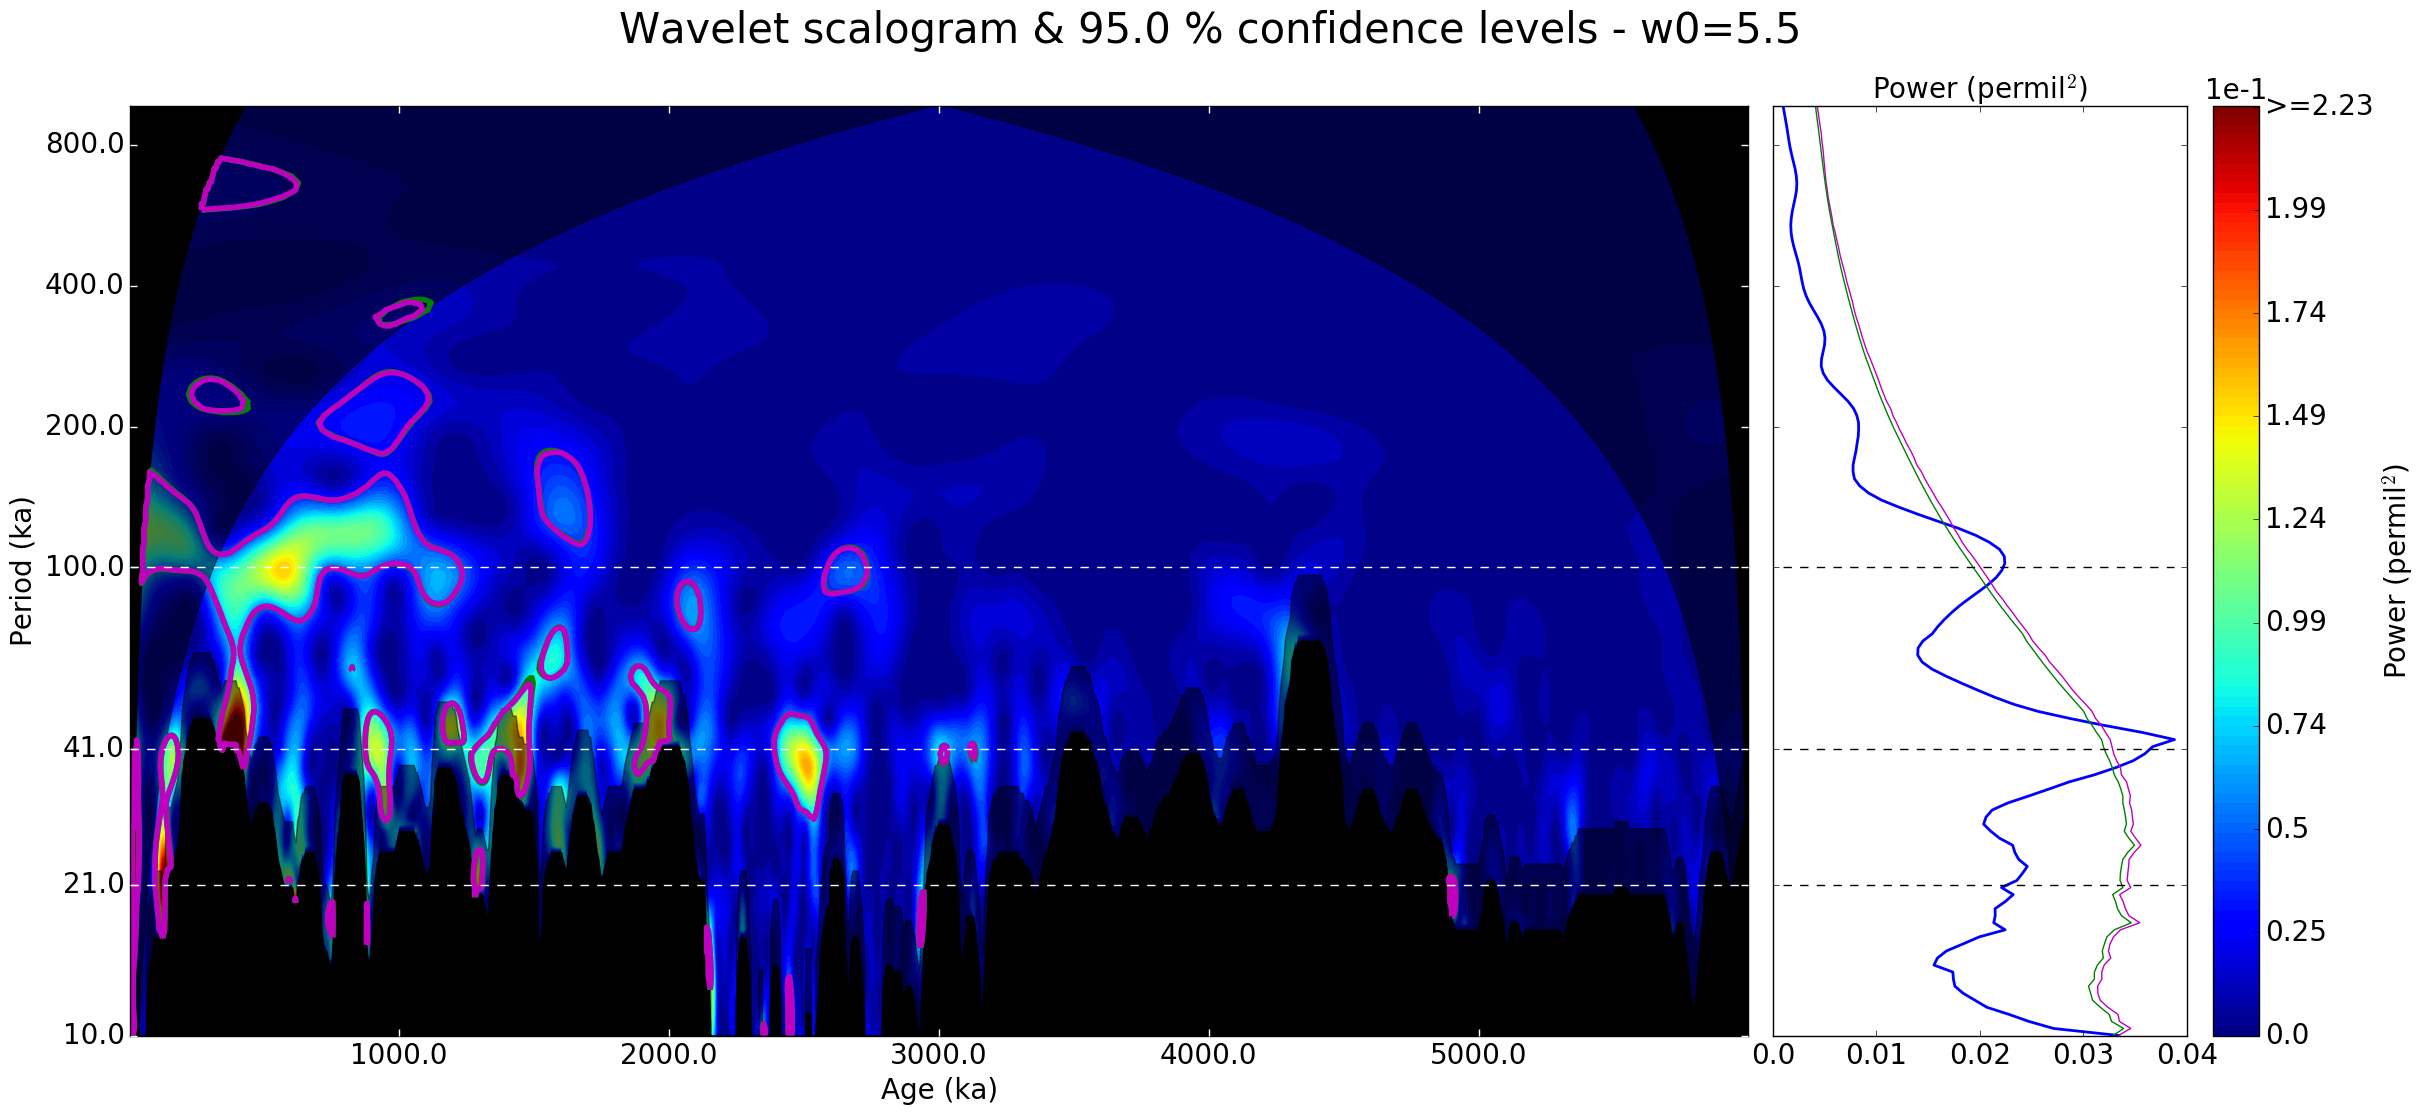

In [15]:
power_string=[0., 0.01, 0.02, 0.03, 0.04]
plot_scalogram=x.plot_scalogram(color_cl_anal=['g'],color_cl_mcmc=['m'],fontsize_title=30,fontsize_axes=20,fontsize_ticks=20,linewidth_cl=4,global_scal_xlabel_ticks="bottom",decimals=2,linewidth_gscal=2.0,time_string=time_string,period_string=period_string,dashed_periods=dashed_periods,power_string=power_string)
plot_scalogram.suptitle("Wavelet scalogram & 95.0 % confidence levels - w0=5.5",fontsize=30)
fig = plt.gcf() 
fig.set_size_inches(24,12)
plot_scalogram.savefig(mypath+"scalogram_w0_5,5.pdf")
plot_scalogram.show() 

Check the convergence of the analytical confidence levels

In [16]:
#plot_check_convergence_percentiles_cwt=x.plot_check_convergence_percentiles_cwt(fontsize_suptitle=13,fontsize_title=9,fontsize_axes=8,fontsize_ticks=6)
#fig = plt.gcf()
#fig.set_size_inches(6,5)
#plot_check_convergence_percentiles_cwt.savefig(mypath+"check_convergence_percentiles_cwt_w0_5,5.pdf")
#plot_check_convergence_percentiles_cwt.show()

Figure of the amplitude scalogram

In [17]:
#plot_amplitude=x.plot_cwtamplitude(global_amplitude_xlabel_ticks="bottom",decimals=2,linewidth_gampl=2.0,time_string=time_string,period_string=period_string,dashed_periods=dashed_periods)
#fig = plt.gcf() 
#fig.set_size_inches(11,5)
#plot_amplitude.savefig(mypath+"amplitude_smoothed_w0_5,5.pdf")
#plot_amplitude.show() 

### 4.2 Second analysis: with w0=15

In [18]:
y=copy.copy(x)

In [19]:
y.timefreq_analysis(theta=theta,percentile=percentile,w0=15.0,permin=10.,computes_amplitude=True)

  0%|          | 4/1000 [00:00<00:30, 33.10it/s]

Weights for the scalogram and Shannon-Nyquist exclusion zone:


  0%|          | 0/104 [00:00<?, ?it/s]

Re-estimated period range: from  10.0  to  355.062231062
Main loop, over the time-frequency plane:


100%|██████████| 104/104 [16:12<00:00, 20.48s/it]


Figure of the scalogram

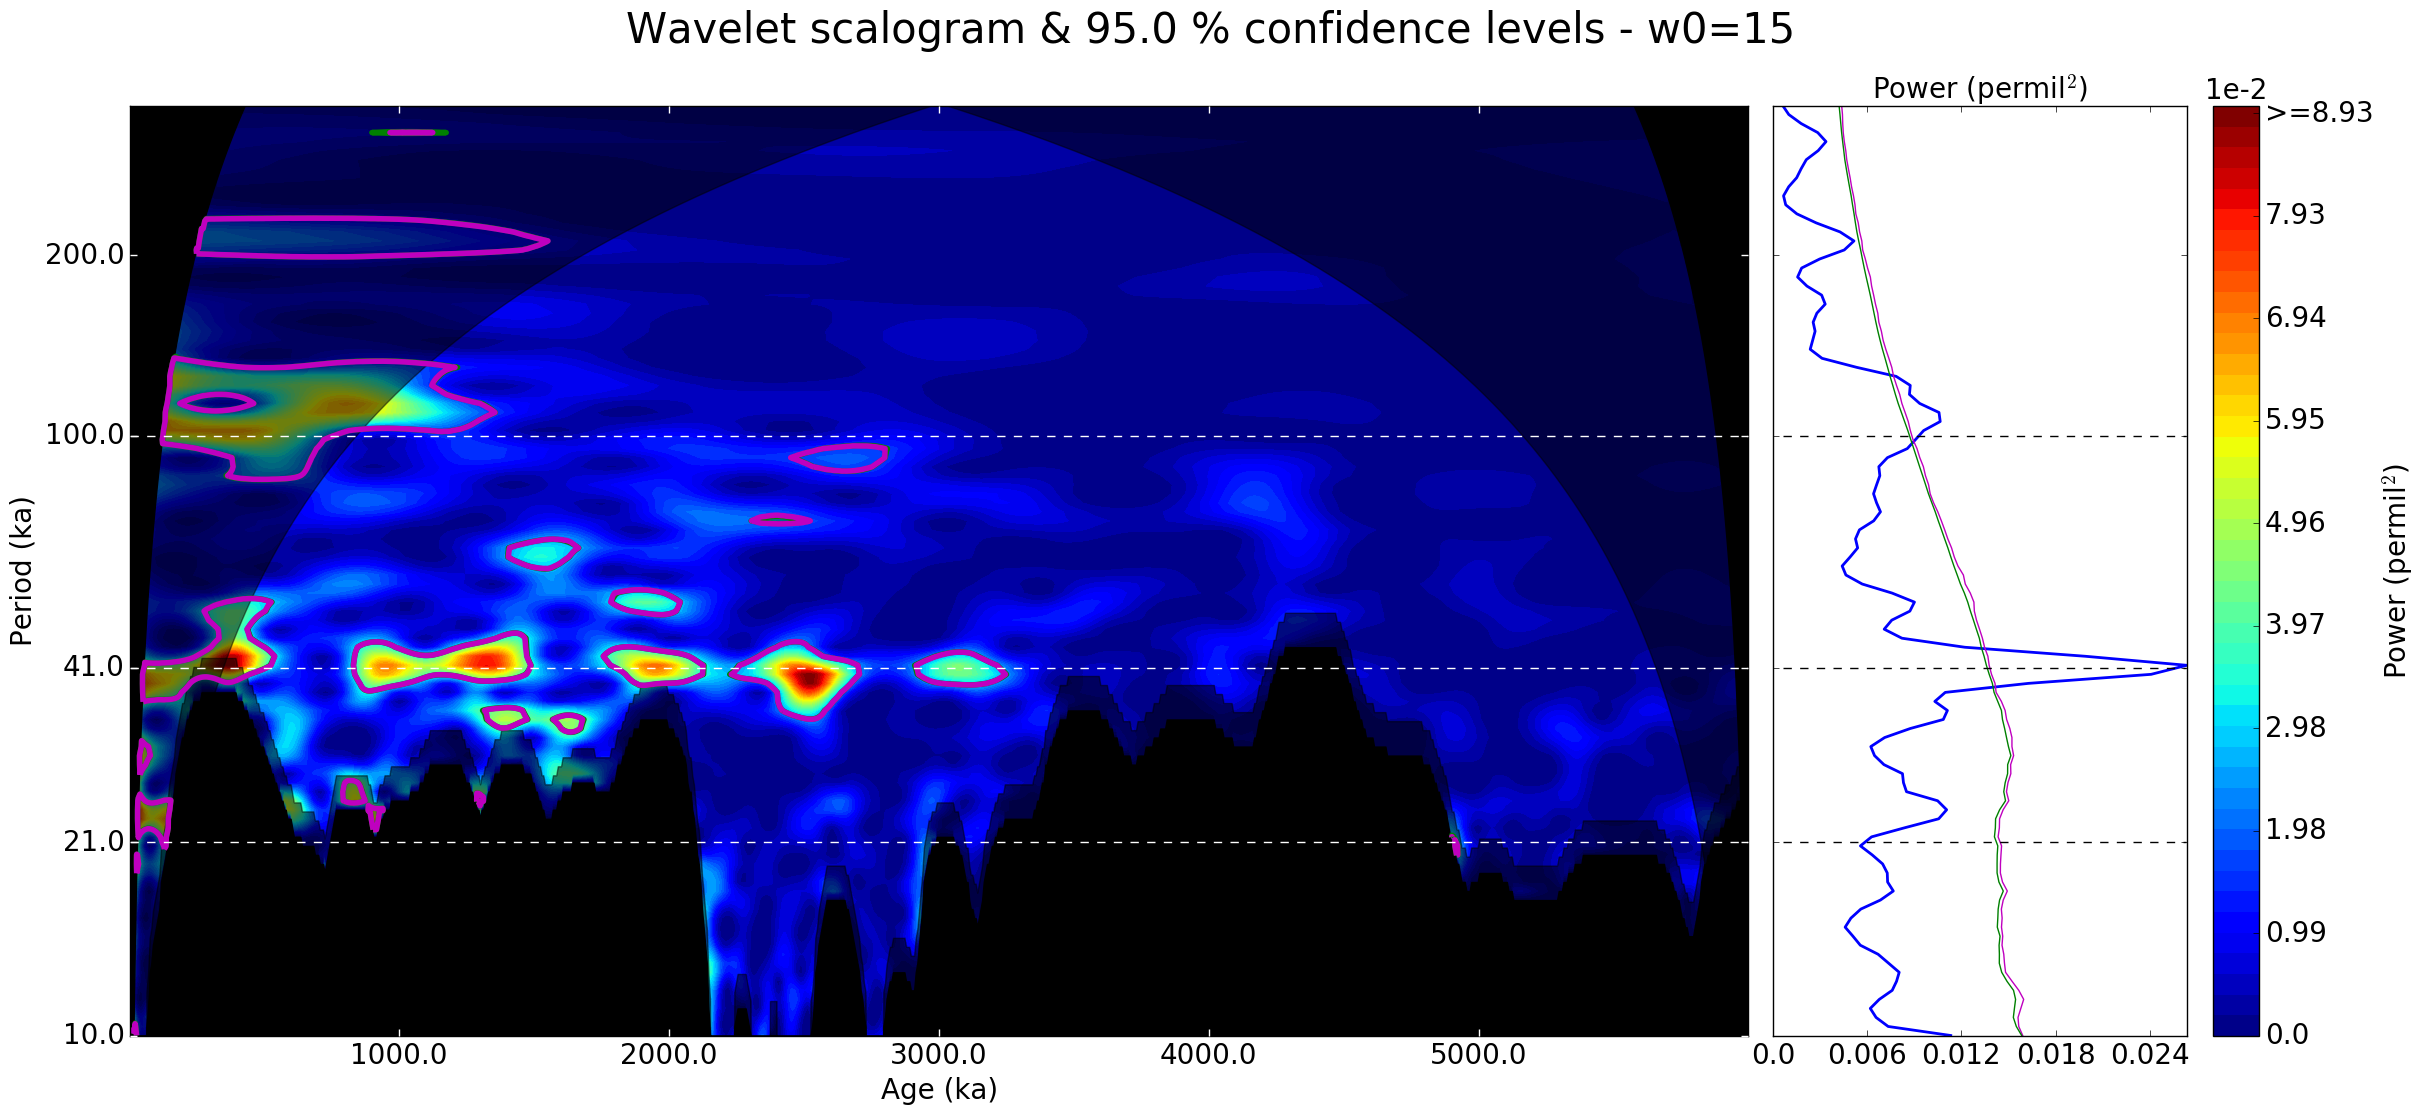

In [20]:
power_string=[0., 0.006, 0.012, 0.018, 0.024]
plot_scalogram=y.plot_scalogram(color_cl_anal=['g'],color_cl_mcmc=['m'],linewidth_cl=4,global_scal_xlabel_ticks="bottom",fontsize_title=30,fontsize_axes=20,fontsize_ticks=20,decimals=2,linewidth_gscal=2.0,time_string=time_string,period_string=period_string,dashed_periods=dashed_periods,power_string=power_string)
plot_scalogram.suptitle("Wavelet scalogram & 95.0 % confidence levels - w0=15",fontsize=30)
fig = plt.gcf() 
fig.set_size_inches(24,12)
plot_scalogram.savefig(mypath+"scalogram_w0_15.pdf")
plot_scalogram.show() 

Check the convergence of the analytical confidence levels

In [21]:
#plot_check_convergence_percentiles_cwt=y.plot_check_convergence_percentiles_cwt(fontsize_suptitle=13,fontsize_title=9,fontsize_axes=8,fontsize_ticks=6)
#fig = plt.gcf()
#fig.set_size_inches(6,5)
#plot_check_convergence_percentiles_cwt.savefig(mypath+"check_convergence_percentiles_cwt_w0_15.pdf")
#plot_check_convergence_percentiles_cwt.show()

Figure of the amplitude scalogram

In [22]:
#power_string=[0.04, 0.08, 0.12, 0.16]
#plot_amplitude=y.plot_cwtamplitude(power_string=power_string,global_amplitude_xlabel_ticks="bottom",decimals=2,linewidth_gampl=2.0,time_string=time_string,period_string=period_string,dashed_periods=dashed_periods)
#fig = plt.gcf() 
#fig.set_size_inches(10,5)
#plot_amplitude.savefig(mypath+"amplitude_smoothed_w0_15.pdf")
#plot_amplitude.show() 

## 5. Filtering (w0=15)

Significance testing is unuseful for filtering, so we deactivate it to reduce the computing time. 

In [23]:
z=copy.copy(y)

In [24]:
z.carma_params(signif_level_type="")

Define the times at which the CWT (continuous wavelet transform) is to be computed

In [25]:
theta=np.linspace(myt[0],myt[-1],2000)

Set the location of the ticks

In [26]:
time_string=[0., 500., 1000., 1500., 2000., 2500., 3000., 3500., 4000., 4500., 5000., 5500., 6000.]
period_string=[10., 21., 41., 100., 200., 400., 800., 1500.]
dashed_periods=[21., 41., 100.]

Time-frequency analysis with the amplitude scalogram and without smoothing. This is required for filtering. 

In [27]:
z.timefreq_analysis(theta=theta,w0=15.0,permin=10.,computes_amplitude=True,smoothing_coeff=0.,deltaj=0.01)

  0%|          | 2/2000 [00:00<02:41, 12.40it/s]

Weights for the scalogram and Shannon-Nyquist exclusion zone:


  0%|          | 1/539 [00:00<01:04,  8.34it/s]

Re-estimated period range: from  10.0  to  416.429393741
Main loop, over the time-frequency plane:


100%|██████████| 539/539 [09:17<00:00,  1.32s/it]


Ridge filtering

In [28]:
z.timefreq_ridges_filtering(maxampl_ridge_coeff=0.5)

RIDGEWALK looking for ridge points...


/Users/admin/Library/Python/2.7/lib/python/site-packages/WAVEPAL-3.6-py2.7.egg/wavepal/ridges/frac.py:10: RuntimeWarning: divide by zero encountered in divide
/Users/admin/Library/Python/2.7/lib/python/site-packages/WAVEPAL-3.6-py2.7.egg/wavepal/ridges/ridgequantity.py:35: RuntimeWarning: invalid value encountered in multiply
/Users/admin/Library/Python/2.7/lib/python/site-packages/WAVEPAL-3.6-py2.7.egg/wavepal/ridges/ridgewalk.py:120: RuntimeWarning: invalid value encountered in less
/Users/admin/Library/Python/2.7/lib/python/site-packages/WAVEPAL-3.6-py2.7.egg/wavepal/ridges/ridgewalk.py:120: RuntimeWarning: invalid value encountered in greater_equal
/Users/admin/Library/Python/2.7/lib/python/site-packages/WAVEPAL-3.6-py2.7.egg/wavepal/ridges/ridgewalk.py:120: RuntimeWarning: invalid value encountered in less_equal
/Users/admin/Library/Python/2.7/lib/python/site-packages/WAVEPAL-3.6-py2.7.egg/wavepal/ridges/ridgewalk.py:120: RuntimeWarning: invalid value encountered in greater
/Users

RIDGEWALK found 3384 ridge points.
RIDGEWALK chaining ridges.


/Users/admin/Library/Python/2.7/lib/python/site-packages/WAVEPAL-3.6-py2.7.egg/wavepal/ridges/ridgewalk.py:267: RuntimeWarning: invalid value encountered in greater
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)


RIDGEWALK pruning to 2122 ridge points.
RIDGEWALK finished.
Number of ridges is 16


Band filtering with period bounds

In [29]:
z.timefreq_band_filtering([(35.,45.)])

Figure of the amplitude scalogram with the band and the ridges

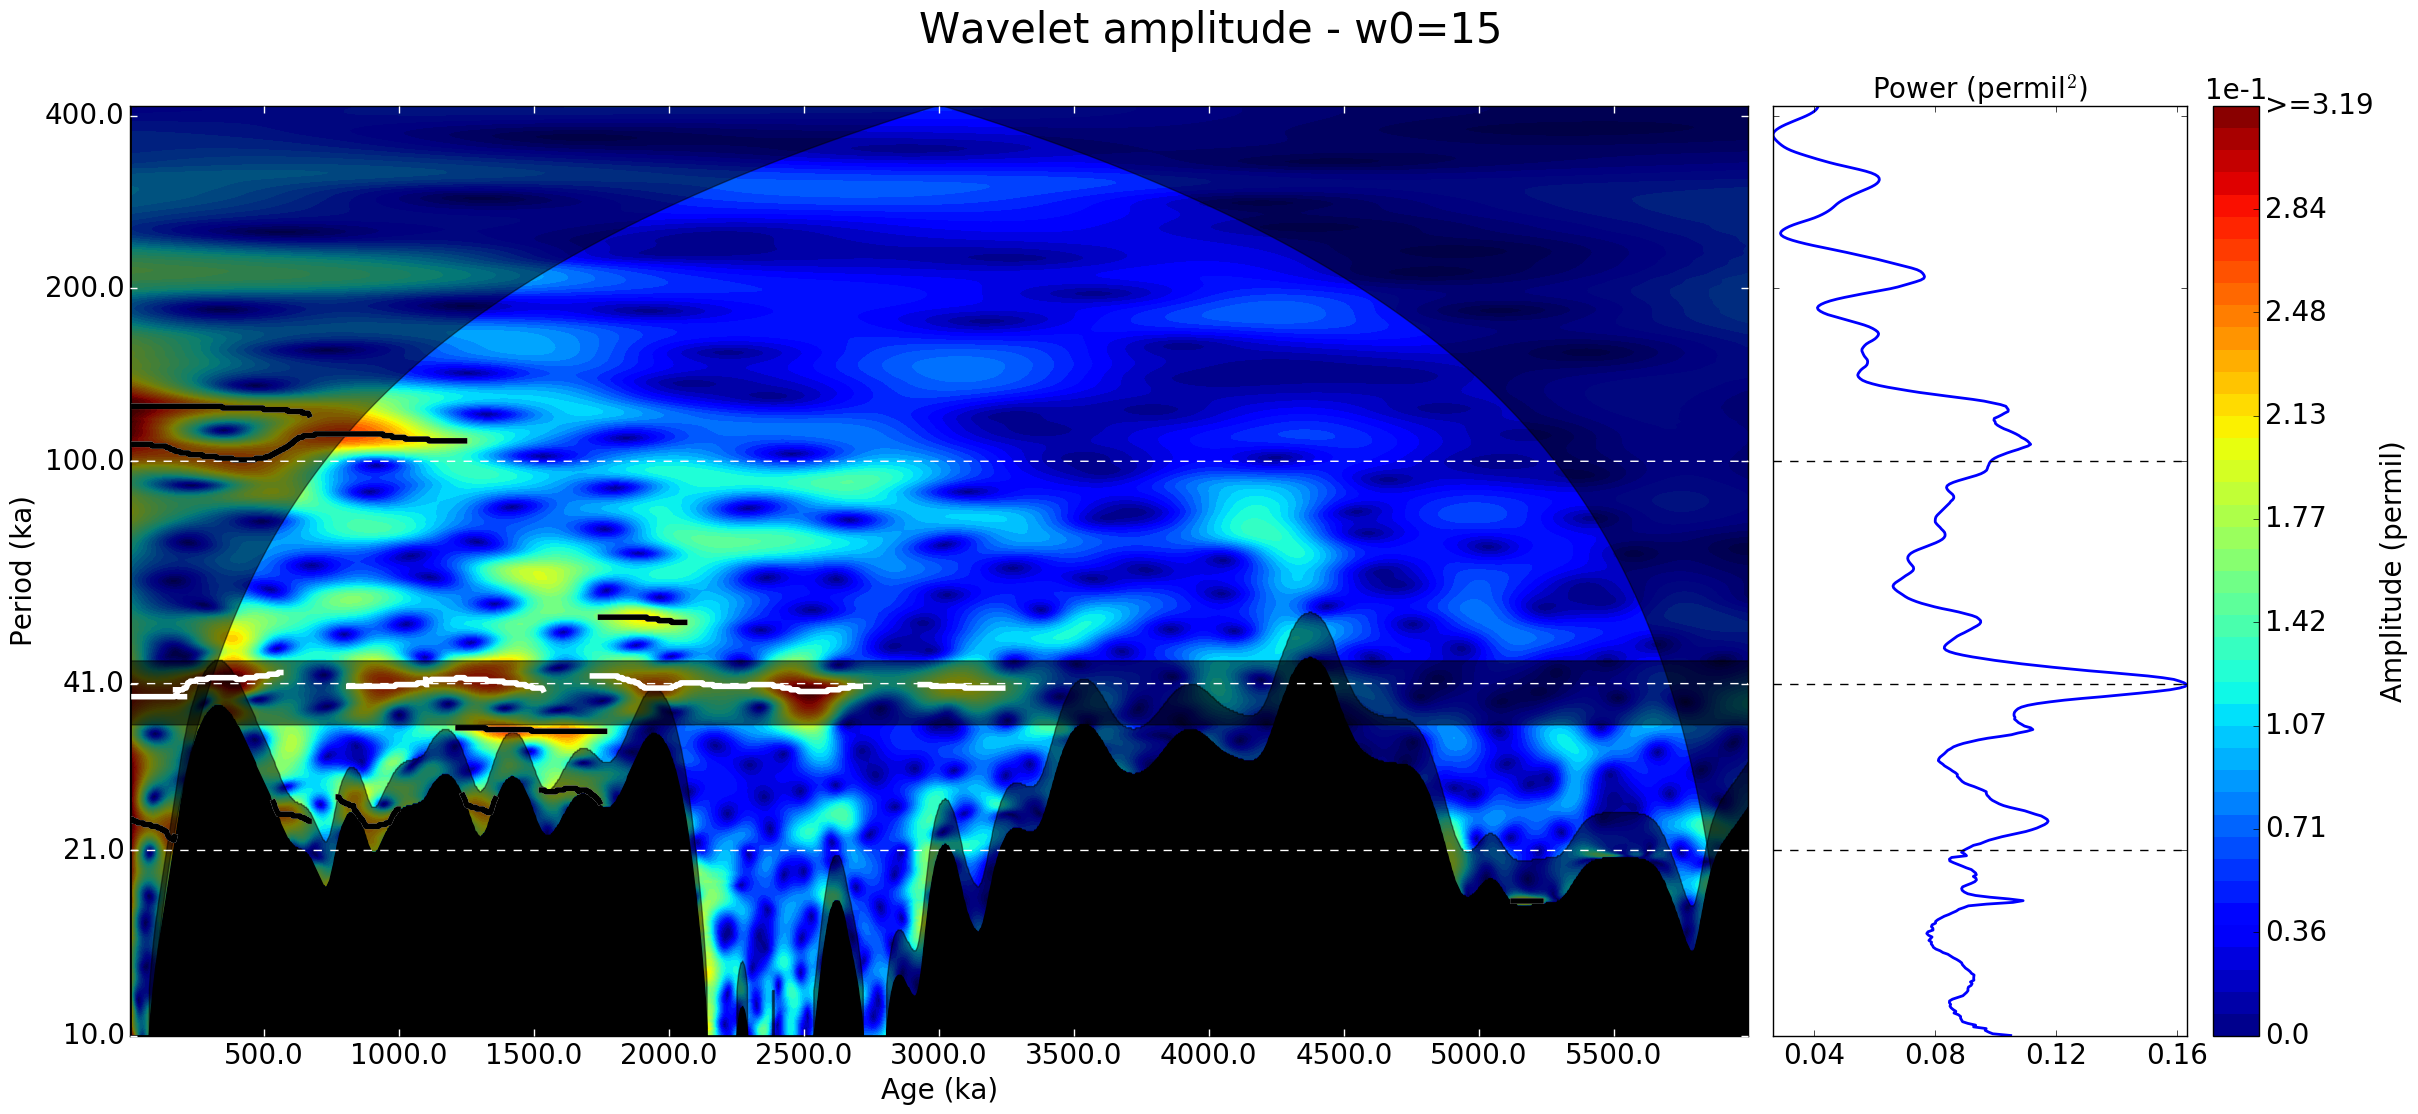

In [30]:
power_string=[0.04, 0.08, 0.12, 0.16]
plot_amplitude=z.plot_cwtamplitude(global_amplitude_xlabel_ticks="bottom",power_string=power_string,decimals=2,linewidth_ridges=4.0,linewidth_gampl=2.0,plot_ridges=True,k_skeleton=[0,2,3,5,6,9,10,11,13,15],plot_band_filtering=True,time_string=time_string,period_string=period_string,dashed_periods=dashed_periods, fontsize_title=30,fontsize_axes=20,fontsize_ticks=20)
plot_amplitude.suptitle("Wavelet amplitude - w0=15",fontsize=30)
fig = plt.gcf() 
fig.set_size_inches(24,12)
plot_amplitude.savefig(mypath+"amplitude_and_filtering_w0_15.pdf")
plot_amplitude.show() 

Figure of the filtered signals

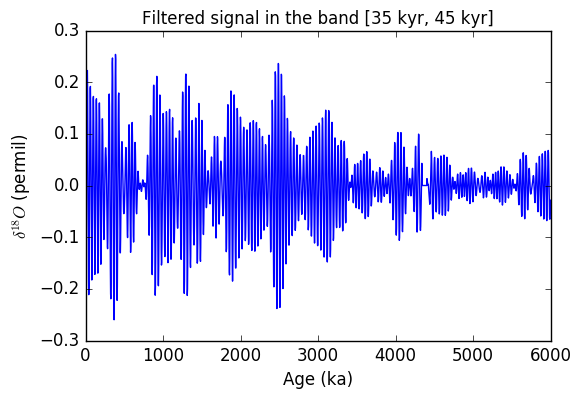

In [31]:
plt.plot(z.theta,z.timefreq_band_filtered_signal[:,0],'b')
plt.xlabel('Age (ka)',fontsize=12)
plt.ylabel('$\delta{}^{18}O$ (permil)',fontsize=12)
plt.title('Filtered signal in the band [35 kyr, 45 kyr]',fontsize=12)
plt.tick_params(labelsize=12)
plt.savefig(mypath+"band_filtering.pdf") 
plt.show()

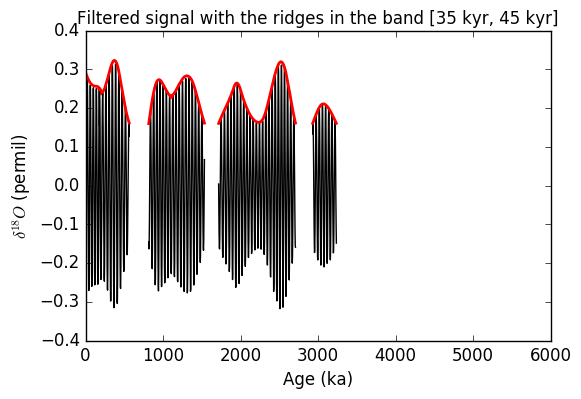

In [32]:
myridges=[1,4,7,8,12,14]
for l in range(len(myridges)):
    k=myridges[l]
    mysignal=z.skeleton[k][2]*np.cos(2.*np.pi*z.skeleton[k][0]/z.skeleton[k][1])+z.skeleton[k][3]*np.sin(2.*np.pi*z.skeleton[k][0]/z.skeleton[k][1])
    plt.plot(z.skeleton[k][0],mysignal,'k')
    myampl=z.skeleton[k][4]
    plt.plot(z.skeleton[k][0],myampl,'r',linewidth=2)
plt.xlabel('Age (ka)',fontsize=12)
plt.ylabel('$\delta{}^{18}O$ (permil)',fontsize=12)
plt.title('Filtered signal with the ridges in the band [35 kyr, 45 kyr]',fontsize=12)
plt.tick_params(labelsize=12)
plt.axis([0,6000,-0.4,0.4])
plt.savefig(mypath+"ridge_filtering.pdf") 
plt.show()